## Logistic regression analysis
####  In this we are going to learn the Logistic regression analysis with the help of Credit card dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Print multiple statment in a single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
## Load Dataset
df_default = pd.read_csv("C:/E/Github/Data_Files/Credit_Card_Defaulter/Credit_Card_defaulters.csv")

In [4]:
df_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [5]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


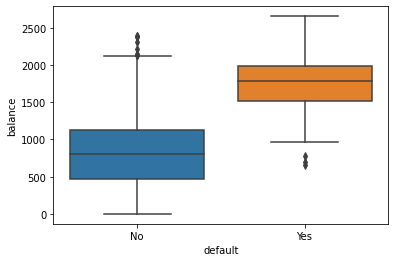

In [6]:
## Lets do some EDA
## Create BOX Plot
sns.boxplot(x = "default",y = "balance",data= df_default)

Peoples who have higher balance likely to defaulters but there are some outliers for cases.

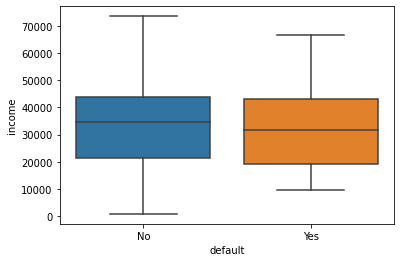

In [7]:
## Create BOX Plot
sns.boxplot(x = "default",y = "income",data= df_default)

People who have lower income ,likey to defaulters 

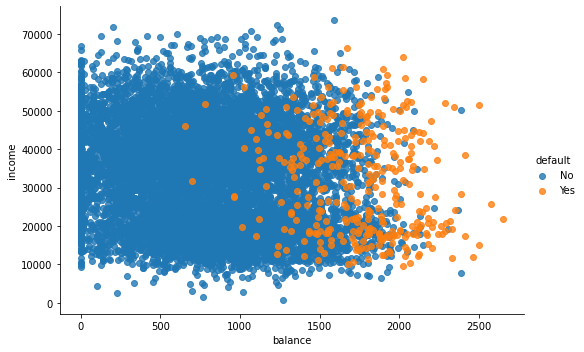

In [8]:
## Lets do multivariate analysis
sns.lmplot(y= "income", x="balance",data=df_default,fit_reg= False,hue= "default",aspect= 1.5, height= 5)

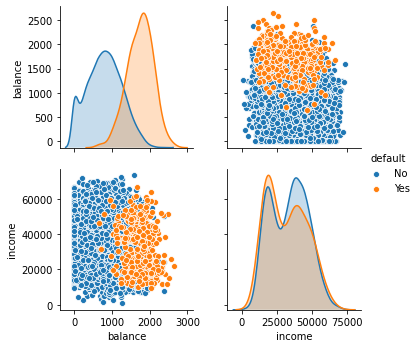

In [9]:
sns.pairplot(df_default,hue="default")

As per above graph we can see that balance seems major player than income. Because If you see we can draw a line and easily predict defaulter on the balance basis

In [10]:
## Lets summarised the student and defaulters data ina  one table
pd.crosstab(df_default["student"],df_default["default"],rownames=["student"],colnames=["default"])

default,No,Yes
student,,
No,6850,206
Yes,2817,127


we can see from the above that major populations those who are not students also they are not defaulters

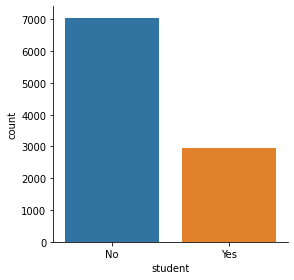

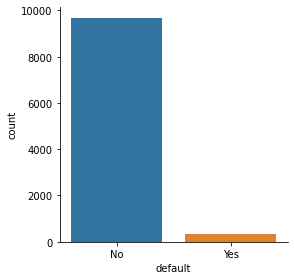

In [11]:
##lets visualise the categorical features
sns.catplot(x = "student",data= df_default,kind="count",height=4,aspect=1)
sns.catplot(x = "default",data= df_default,kind="count",height=4,aspect=1)

In [12]:
## convert categorical to numerical using get_dummies
default_dummy = pd.get_dummies(df_default["default"],prefix="default")
student_dummy = pd.get_dummies(df_default["student"],prefix="student")

In [13]:
default_dummy
student_dummy

,default_No,default_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


,student_No,student_Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


In [14]:
df_default.head()
df_default = pd.concat([df_default,default_dummy,student_dummy],axis= 1)
df_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


,default,student,balance,income,default_No,default_Yes,student_No,student_Yes
0,No,No,729.526495,44361.62507,1,0,1,0
1,No,Yes,817.180407,12106.13470,1,0,0,1
2,No,No,1073.549164,31767.13895,1,0,1,0
3,No,No,529.250605,35704.49394,1,0,1,0
4,No,No,785.655883,38463.49588,1,0,1,0


In [15]:
df_default = df_default.drop(["default_No","student_No","default","student"],axis=1)
df_default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [16]:
## other way to conver in dummy variables
#pd.Categorical(df_default["student"]).categories
#pd.Categorical(df_default["student"]).codes
#pd.Categorical(df_default["default"]).categories
#pd.Categorical(df_default["default"]).codes

In [17]:
#col = []
#for col in df_default:
#    if df_default[col].dtype == "object":
#        df_default[col] = pd.Categorical(df_default[col]).codes

In [18]:
df_default.head()
df_default.shape
type(df_default)
df_default.size

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


(10000, 4)

pandas.core.frame.DataFrame

40000

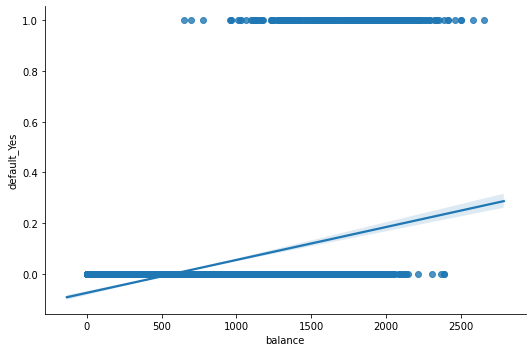

In [19]:
## try to check the simple Linear Regression on this data
sns.lmplot(x="balance",y = "default_Yes",data= df_default,height= 5, aspect=1.5, fit_reg= True)

In [20]:
## Lets bulid the Linear Regression model using default and balanace 
X = df_default[["balance"]]
y = df_default["default_Yes"]
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
linreg.predict(X)
linreg.coef_
linreg.intercept_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([ 0.01955324,  0.03093704,  0.06423221, ...,  0.03460354,
        0.12857867, -0.04909776])

array([0.00012987])

-0.07519195884353799

we can see that Linear regression line incorrectly devide a single category into two. Linear regression cannot predict the value of categorical variable and if we sue this line to predict the output then this will not have any correct information about outcome variable. Also outcome becomes greater 1 and less than 0.

### Apply Logistic Regression model usning only default and balance to verify the concept of sigmoid or Logit Function

We will use logictic regression when the target variable is categorical.
This transform linear function to a no-linear function(sigmoid or Logit) that can predict categories with probabilities.
Using this predicted Y will always between 0 and 1.


In [21]:
# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42) # Set Large C value for low regularization
logreg.fit(X, y)

logreg.coef_
logreg.intercept_
y_pred = logreg.predict_proba(X) ## Predict probability estimates.

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([[0.00549892]])

array([-10.65132867])

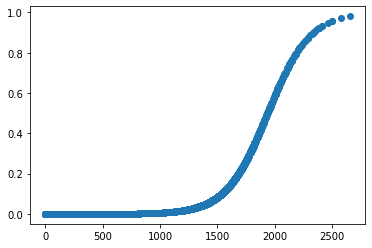

In [22]:
## Now see the sigmoid curve.
plt.scatter(X.values,y_pred[:,1])

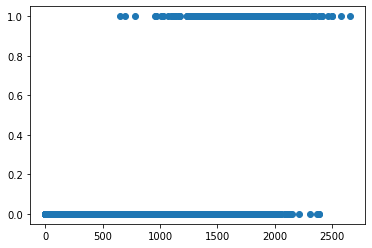

In [23]:
## Now plot the graph with training target data
plt.scatter(X.values,y)

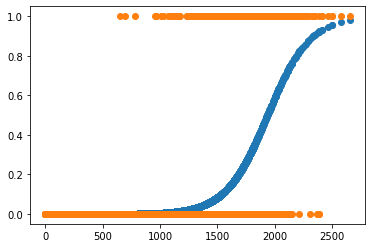

In [24]:
## Now combine predicted non-linear line(sigmoid curve) with trainning target data (y)
plt.scatter(X.values,y_pred[:,1])
plt.scatter(X.values,y)

we can see from the above graph that predicted sigmoid line lies between 0 and 1.

## Lets draw graph using sigmoid function

In [25]:

x = X
y_linlog = logreg.intercept_ + logreg.coef_*x   ### Linear line (y = mx +c)


y_linlog = **intercept** ($\beta_0$): + **coefficient** ($\beta_1$)*x

In [26]:
# Now write the sigmoid function p(y) = probablity(y_linlog) =sig_y_linlog = exponential of y_linlog / 1 + exponential of y_linlog
prob_y_linlog = np.exp(y_linlog) / (1 + np.exp(y_linlog))

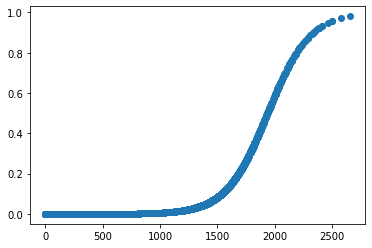

In [27]:
## Now draw the scatter plot between x (train value) and y (probablity of y)
plt.scatter(x,prob_y_linlog)
## we can see all the values lies between 0 and 1 It means It follow the Probablity rule.

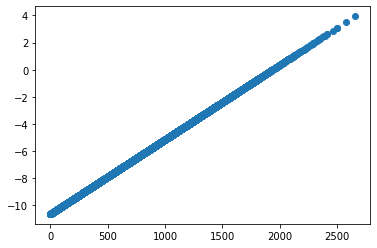

In [28]:
## Now Draw the Logistic regression line without converting into sigmoid function
## It follow the Linear line and cannot predic the categorical value
plt.scatter(x,y_linlog)

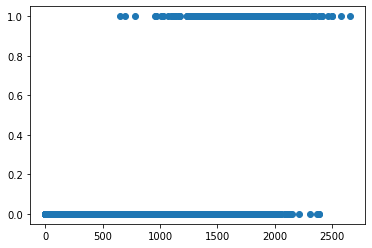

In [29]:
## Now plot the grapth between Training Independent variable "Balance" and Categorical Target Traing data "Default")
plt.scatter(df_default["balance"],df_default["default_Yes"])

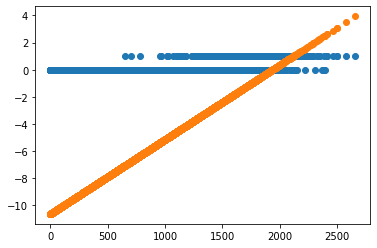

In [30]:
### Now If we compare the Input training data with predicted data without converting in probablity
plt.scatter(df_default["balance"],df_default["default_Yes"])
plt.scatter(x,y_linlog)

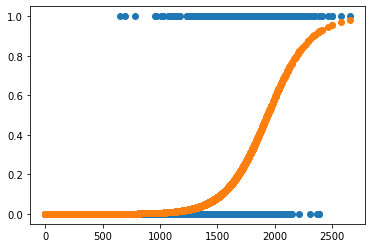

In [31]:
### Now If we compare the Input training data with predicted data with converting in probablity
plt.scatter(df_default["balance"],df_default["default_Yes"])
plt.scatter(x,prob_y_linlog)

## Now Creating logictic Model using all variables

In [32]:
## Import librairies
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,average_precision_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
df_default.sample(n = 15, random_state= 4)

,balance,income,default_Yes,student_Yes
1603,1247.067238,15522.58415,0,1
8713,662.995363,12008.33574,0,1
4561,970.426089,20569.64004,0,1
6600,1156.620200,11102.56815,0,1
2558,421.896902,37323.75941,0,0
7642,1194.205725,45588.18069,0,0
8912,600.939090,43846.20889,0,0
3319,856.479157,69124.26850,0,0
6852,770.328029,29059.14469,0,1
1366,1273.581981,18475.19238,0,1


In [34]:
## create X and y 
X = df_default.drop("default_Yes", axis=1)

In [35]:
X.head()

,balance,income,student_Yes
0,729.526495,44361.62507,0
1,817.180407,12106.13470,1
2,1073.549164,31767.13895,0
3,529.250605,35704.49394,0
4,785.655883,38463.49588,0


In [36]:
Y = df_default["default_Yes"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: uint8

In [37]:
## split X and Y
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [38]:
X_train.head()
type(X_train)
X_test.head()
type(X_test)

,balance,income,student_Yes
9069,0.000000,41239.02051,0
2603,961.999353,37073.19238,0
7738,655.611221,19039.16827,1
1579,864.047198,27690.11354,0
5058,1306.832034,57561.41126,0


pandas.core.frame.DataFrame

,balance,income,student_Yes
6252,1435.662933,31507.08928,0
4684,771.789347,42139.07027,0
1731,0.000000,21809.21851,0
4742,113.571264,32803.83265,0
4521,1358.132472,49903.59708,0


pandas.core.frame.DataFrame

In [39]:
Y_train.head()
type(Y_train)
Y_test.head()
type(Y_test)

9069    0
2603    0
7738    0
1579    0
5058    0
Name: default_Yes, dtype: uint8

pandas.core.series.Series

6252    0
4684    0
1731    0
4742    0
4521    0
Name: default_Yes, dtype: uint8

pandas.core.series.Series

In [40]:
logreg = LogisticRegression(C=.1)
logreg.fit(X_train,Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Y_pred = logreg.predict(X_test)
Y_pred
type(Y_pred)
Y_pred.size


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

numpy.ndarray

3000

In [42]:
logreg.coef_
logreg.intercept_

array([[ 3.45660833e-03, -1.27575957e-04, -3.11003593e+00]])

array([-2.3871962])

In [43]:
coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coef

,0,0
0,balance,0.003457
1,income,-0.000128
2,student_Yes,-3.110036


In [44]:
pd.DataFrame(X.columns)

,0
0,balance
1,income
2,student_Yes


In [45]:
print("Defaulter in Y_test: ", Y_test[Y_test == 1].shape[0])
print("non- Defaulter in Y_test: ", Y_test[Y_test == 0].shape[0])
print("Defaulter in Y_pred: ", Y_pred[Y_pred == 1].shape[0])
print("non- Defaulter in Y_pred: ", Y_pred[Y_pred == 0].shape[0])

Defaulter in Y_test:  94
non- Defaulter in Y_test:  2906
Defaulter in Y_pred:  24
non- Defaulter in Y_pred:  2976


In [46]:
## Measure performance metrics
log_accuracy = metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy Score : ", log_accuracy)
classification = metrics.classification_report(Y_test,Y_pred)
print(classification)
roc_auc_score = metrics.roc_auc_score(Y_test,Y_pred)
print("roc_auc_score : ",roc_auc_score)

Accuracy Score :  0.968
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2906
           1       0.46      0.12      0.19        94

    accuracy                           0.97      3000
   macro avg       0.72      0.56      0.59      3000
weighted avg       0.96      0.97      0.96      3000

roc_auc_score :  0.5562738867493521


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [47]:
## Create a confusion metric to understand the classification
conf = metrics.confusion_matrix(Y_test,Y_pred)
conf

array([[2893,   13],
       [  83,   11]], dtype=int64)

In [48]:
from mlxtend.plotting import plot_confusion_matrix
##  http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

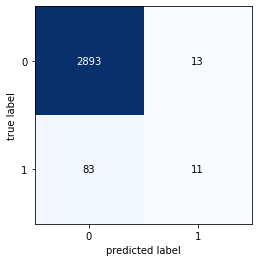

In [49]:
fig, ax = plot_confusion_matrix(conf_mat=conf)
plt.show()

In [50]:
## https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
import numpy as np


def draw_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    draw_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

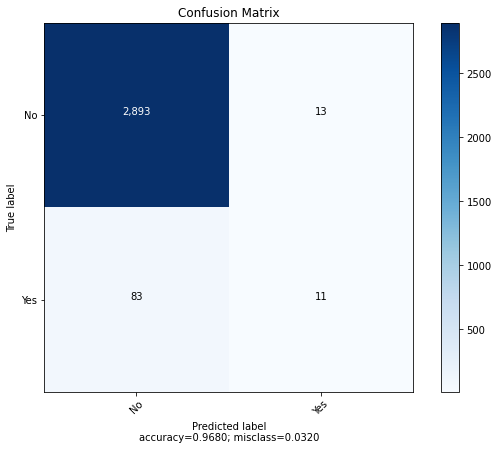

In [51]:
draw_confusion_matrix(cm=conf, normalize = False,target_names = ['No','Yes'],title= "Confusion Matrix")

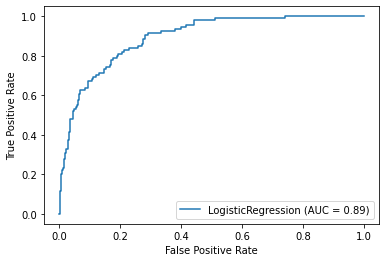

In [52]:
## There are 2 way to draw the ROC chart
metrics.plot_roc_curve(logreg,X_test,Y_test)

ROC_AUC is :  0.8925407447540672


Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

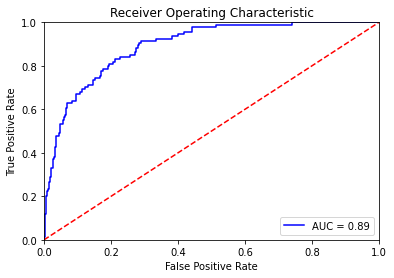

In [53]:
## Draw ROC AUC and measure the AUC score
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("ROC_AUC is : " , roc_auc)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


AUC can range from 50% to 100%. Higher the AUC value, better is the prediction power of model.

In [54]:
AUC = metrics.roc_auc_score(Y_test,preds)

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

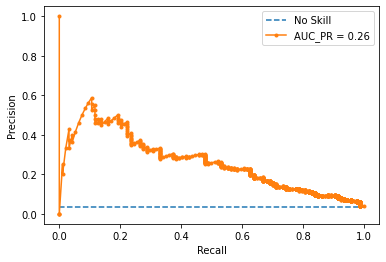

In [55]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
Y_pred_prob = logreg.predict_proba(X_test)
# retrieve just the probabilities for the positive class
Y_Prob_Pred = Y_pred_prob[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(Y[Y==1]) / len(Y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_Prob_Pred)
# calculate precision-recall AUC for above graph
auc_p_r = auc(recall, precision)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label = 'AUC_PR = %0.2f' % auc_p_r)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

    https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
    https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [56]:
F1Score = metrics.f1_score(Y_test,Y_pred)
F1Score

0.1864406779661017

## When to Use **ROC vs. Precision-Recall Curves**?

    Generally, the use of ROC curves and precision-recall curves are as follows:

    ROC curves should be used when there are roughly equal numbers of observations for each class.
    Precision-Recall curves should be used when there is a moderate to large class imbalance.
